In [77]:
import folium
import numpy as np
import matplotlib.pyplot as plt
import functools 
import cartopy.crs as ccrs
import random

In [2]:
vistaulisation_map = folium.Map(location=[50.049683,
                         19.944544], zoom_start=5)

In [3]:
vistaulisation_map

In [84]:
def divergence(F):
    """ compute the divergence of n-D scalar field F """
    return functools.reduce(np.add,np.gradient(F))

In [91]:
"""
Regridding vectors with quiver
------------------------------

This example demonstrates the regridding functionality in quiver (there exists
equivalent functionality in :meth:`cartopy.mpl.geoaxes.GeoAxes.barbs`).

Regridding can be an effective way of visualising a vector field, particularly
if the data is dense or warped.
"""



def sample_data(shape=(100, 100)):
    """
    Returns ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned CRS will be a North Polar
    Stereographic projection, meaning that the vectors will be unevenly
    spaced in a PlateCarree projection.

    """
    crs = ccrs.NorthPolarStereo()
    scale = 1e7
    x = np.linspace(-scale, scale, shape[1])
    y = np.linspace(-scale, scale, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = divergence(x2d)
    v = divergence(y2d)
    return x, y, u, v, crs






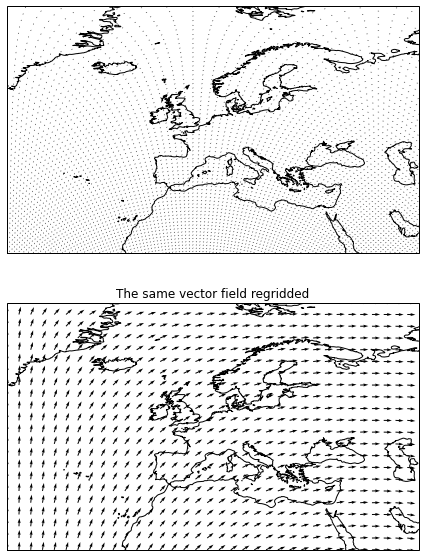

In [92]:
    plt.figure(figsize=(8, 10))
    x, y, u, v, vector_crs = sample_data(shape=(159, 159))
    ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
    ax1.coastlines('50m')
    ax1.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
    ax1.quiver(x, y, u, v, transform=vector_crs)

    ax2 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
    plt.title('The same vector field regridded')
    ax2.coastlines('50m')
    ax2.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
    ax2.quiver(x, y, u, v, transform=vector_crs, regrid_shape=22)

    plt.show()